# **Movie Recommendations**

Movie recommendation systems are everywhere nowadays. Wheather it is online streaming platform or a store for buying movies online, you will encounter some kind of reccomendation system. 

This notebook is all about a simple machine learning model, to predict the movie that the customer most possibly would like to watch or buy. This is a very basic kind of reccomendation model with very much less data of customer watch time with some time span.

## **Types of recommeder system**

There are 2 types of recommender system.

* Collaborative filtering methods - Ex: E-commerce store like Amazon.
* Content based methods - Ex: Netflix Movie Rec.

To find more, check this <a href="https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada">link</a>.

# Collaborative versus content

The purpose of a recommender system is to suggest relevant items to users. To achieve this task, there exist two major categories of methods : collaborative filtering methods and content based methods. Before digging more into details of particular algorithms, let’s discuss briefly these two main paradigms.

In [ ]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
columns = ['user_id','item_id','ratings','timestamp']
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Movie-Recommender-in-python/master/u.data',sep='\t', names=columns)

In [ ]:
data

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [ ]:
mov = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Movie-Recommender-in-python/master/Movie_Id_Titles')

In [ ]:
mov

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
data = pd.merge(data,mov,on='item_id')

In [ ]:
data

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


Trying to find the average ratings for movies.
#### Here, rating of 5 can not be possible for a particular movie. It is because of a single 5 start rating or multiple 5 start ratings. Vice verca the 1 start ratings makes the sense.

In [ ]:
data.groupby('title')['ratings'].mean().sort_values()

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
                                               ... 
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
Santa with Muscles (1996)                       5.0
Prefontaine (1997)                              5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Name: ratings, Length: 1664, dtype: float64

Group by the columns by title and ratings to find the total counts of ratings for a particular movies, where we can see that at the botoom only single reviews are there which is the reason for 5 start reviews.

In [ ]:
data.groupby('title')['ratings'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: ratings, Length: 1664, dtype: int64

In [ ]:
#group of non sorted values with mean of ratings
ratings = pd.DataFrame(data.groupby('title')['ratings'].mean())

In [ ]:
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
ratings['No of ratings'] = pd.DataFrame(data.groupby('title')['ratings'].count())

In [ ]:
ratings

,ratings,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


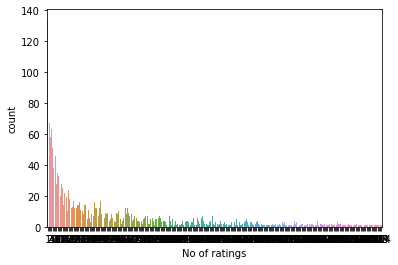

In [ ]:

sns.countplot(ratings['No of ratings'])

In [ ]:
plt.figure(figsize=(10,4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

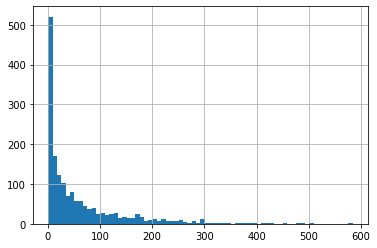

In [ ]:
ratings['No of ratings'].hist(bins=70)

Here next is the plot of ratings. This is to find out how is data is distributed. By looking at it, we can say that most of the values lies between 2 to 4.5 and there are some outliers with values 1 and 5. The distributino looks normal distribution. It almost follows the bell curve.

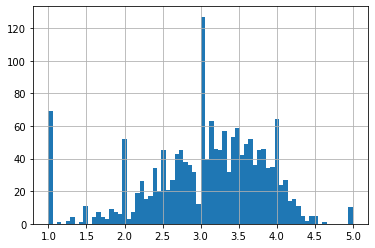

In [ ]:
ratings['ratings'].hist(bins=70)

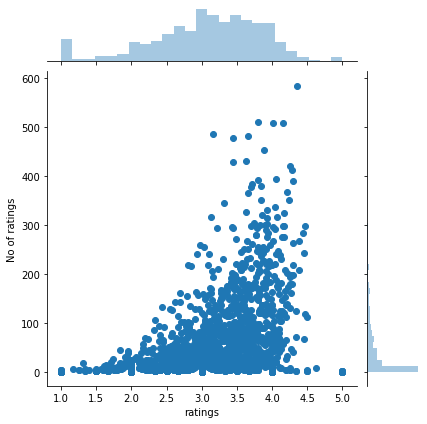

In [ ]:
sns.jointplot(y=ratings['No of ratings'], x=ratings['ratings'])

Now that we have a basic idea of the data distribution, let us make a matrix which contains all the movies names with the ratings along side user id. As 

In [ ]:
moviematrix = pd.pivot_table(data,index='user_id',columns='title',values='ratings')
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values('No of ratings',ascending=False)

,ratings,No of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


Let us take one movie and find the very best movie to watch next, with respect to the choosen movie. For an instance, We choose **Return of the Jedi (1983)**.

In [ ]:
## Let us gather the movie ratings from the moviematrix
jedi_movie_ratings = moviematrix['Return of the Jedi (1983)']

In [ ]:
jedi_movie_ratings

user_id
0      NaN
1      5.0
2      NaN
3      4.0
4      NaN
      ... 
939    NaN
940    3.0
941    5.0
942    NaN
943    4.0
Name: Return of the Jedi (1983), Length: 944, dtype: float64

Now let us find the correlation with other movies. The correlations is basically between 0 and 1. If the values is near to 1 then the movie is more likely the same with the choose movie.

To find the correlation factor we will use **corrwith()** function.

In [ ]:
like_jedi = moviematrix.corrwith(jedi_movie_ratings)
like_jedi.sort_values()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Swept from the Sea (1997)                 -1.0
For Ever Mozart (1996)                    -1.0
Year of the Horse (1997)                  -1.0
Duoluo tianshi (1995)                     -1.0
Two Deaths (1995)                         -1.0
                                          ... 
Woman in Question, The (1950)              NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

We have many Nan values so we will drop them and clean the data.

In [ ]:
corelate_jedi = pd.DataFrame(like_jedi, columns=['correlation'])
corelate_jedi.dropna(inplace=True)
corelate_jedi.sort_values('correlation')

,correlation
title,
Swept from the Sea (1997),-1.0
For Ever Mozart (1996),-1.0
Year of the Horse (1997),-1.0
Duoluo tianshi (1995),-1.0
Two Deaths (1995),-1.0
...,...
"Quiet Room, The (1996)",1.0
King of the Hill (1993),1.0
Manny & Lo (1996),1.0


The 1 correlation factor is not possible. This must be due to single reviews.

In [ ]:
corelate_jedi = corelate_jedi.join(ratings['No of ratings'])

In [ ]:
corelate_jedi 

,correlation,No of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41
...,...,...
Young Guns (1988),0.312489,101
Young Guns II (1990),0.347842,44
"Young Poisoner's Handbook, The (1995)",0.036205,41


In [ ]:
corelate_jedi[corelate_jedi['No of ratings'] > 100].sort_values('correlation',ascending=False).head(10)

,correlation,No of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
Sneakers (1992),0.412559,150
Back to the Future (1985),0.411901,350
"Frighteners, The (1996)",0.391322,115
True Lies (1994),0.364536,208


In [ ]:
##function to find the best 5 movies to watch next
def next_movie(movieName):
  movieRating = moviematrix[movieName]
  similar_movies = moviematrix.corrwith(movieRating)
  similar_kinds = pd.DataFrame(similar_movies, columns=['correlation'])
  similar_kinds.dropna(inplace=True)
  similar_kinds = similar_kinds.join(ratings['No of ratings'])
  list = pd.DataFrame(similar_kinds[similar_kinds['No of ratings'] > 100].sort_values('correlation',ascending=False).head(10))
  print(list.head(5))





In [ ]:
next_movie('Back to the Future (1985)')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                           correlation  No of ratings
title                                                
Back to the Future (1985)     1.000000            350
Speed (1994)                  0.567509            230
Pretty Woman (1990)           0.535240            164
Michael (1996)                0.523826            119
Frighteners, The (1996)       0.523183            115
